In [1]:
%matplotlib notebook

import os.path

import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
#sns.set(style="darkgrid")

import matplotlib.pyplot as plt

In [2]:
def rotate(x):
    plt.setp(x.get_xticklabels(), rotation=45, ha='right')
    return x

In [3]:
sim_base = '~/src/apero/simulations/'

# Row 0 includes some metadata for future reference and tracking purposes
df = pd.read_csv(os.path.join(sim_base, 'sim_02.csv'), skiprows=[0], header=None, names=('advInterval', 'devices', 'payload', 'rxError', 'advDelay'))

math = pd.read_csv('/home/lmolina/src/apero/aloha/math_01.csv', skiprows=[0])

In [5]:
math['advDelay'] = 'math'

In [4]:
df.head()

advInterval  devices  payload  rxError advDelay
0           20        1       31      0.0      625
1           20        1       31      0.0      625
2           20        1       31      0.0      625
3           20        1       31      0.0      625
4           20        1       31      0.0      625

In [6]:
df20 = df.query('advInterval == 20')

<IPython.core.display.Javascript object>


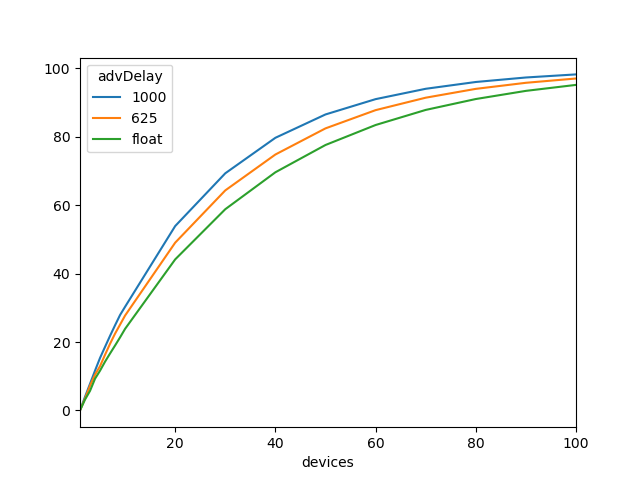

In [7]:
df20.groupby(['devices', 'advDelay'])['rxError'].mean().unstack().plot()

<ipython-input-9-a69ad49684ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['advInterval'] = pd.Categorical(data.advInterval)


<IPython.core.display.Javascript object>


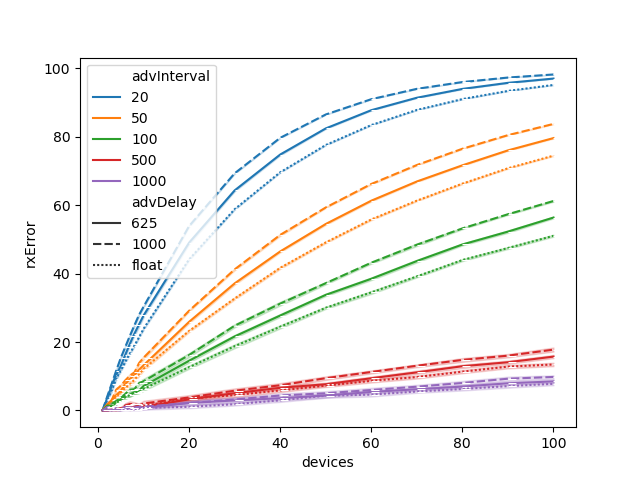

In [9]:
data = df.query('advInterval in ("20", "50", "100", "500", "1000")')
data['advInterval'] = pd.Categorical(data.advInterval)

fig, ax = plt.subplots()
sns.lineplot(
    data=data,
    x="devices", y="rxError",
    style="advDelay",
    hue="advInterval",
    ci=95,
    marker=True,
    #err_style="bars",
    ax=ax)

<IPython.core.display.Javascript object>


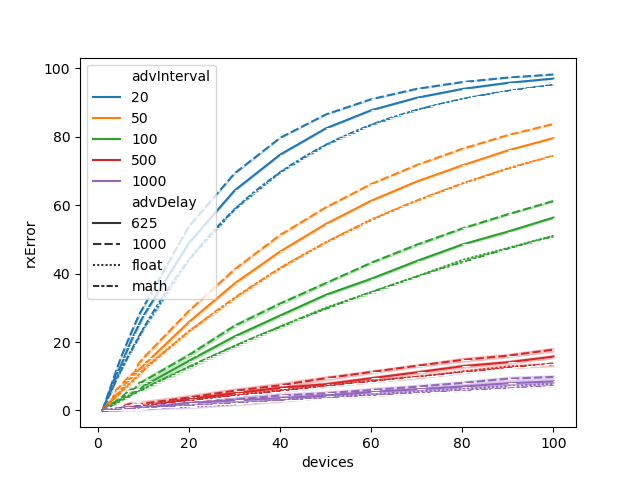

In [6]:
data = pd.concat([df, math]) 


data = data.query('advInterval in ("20", "50", "100", "500", "1000")')
data['advInterval'] = pd.Categorical(data.advInterval)

fig, ax = plt.subplots()
sns.lineplot(
    data=data,
    x="devices", y="rxError",
    style="advDelay",
    hue="advInterval",
    ci=95,
    marker=True,
    #err_style="bars",
    ax=ax)